In [ ]:
#Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Adding csv file

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.dropna(inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [79]:
from sklearn.model_selection import train_test_split

# Separating features (X) and target variable (y)
X = data.drop(['median_house_value'], axis=1)  # Dropping the target column from the dataset
y = data['median_house_value']  # Defining the target variable

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Combining the training features and target variable back into a single DataFrame
train_data = X_train.join(y_train)

# Displaying the combined training data
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,ISLAND,450000.0
3203,-119.64,36.35,23.0,3182.0,563.0,1525.0,585.0,3.8108,INLAND,90400.0
16873,-122.41,37.60,26.0,2754.0,402.0,1128.0,395.0,6.3719,NEAR OCEAN,466900.0
11936,-117.40,33.94,42.0,943.0,171.0,466.0,203.0,3.1458,INLAND,116000.0
13546,-117.30,34.12,34.0,1127.0,275.0,971.0,249.0,2.0583,INLAND,64800.0
...,...,...,...,...,...,...,...,...,...,...
16457,-121.29,38.13,20.0,3168.0,514.0,1390.0,490.0,5.0000,INLAND,154800.0
12884,-121.34,38.66,16.0,3154.0,860.0,1837.0,793.0,1.9805,INLAND,92900.0
6379,-118.05,34.17,45.0,2535.0,455.0,1036.0,437.0,5.0482,INLAND,388900.0
16654,-120.65,35.27,52.0,2254.0,642.0,1237.0,590.0,2.6208,NEAR OCEAN,227100.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

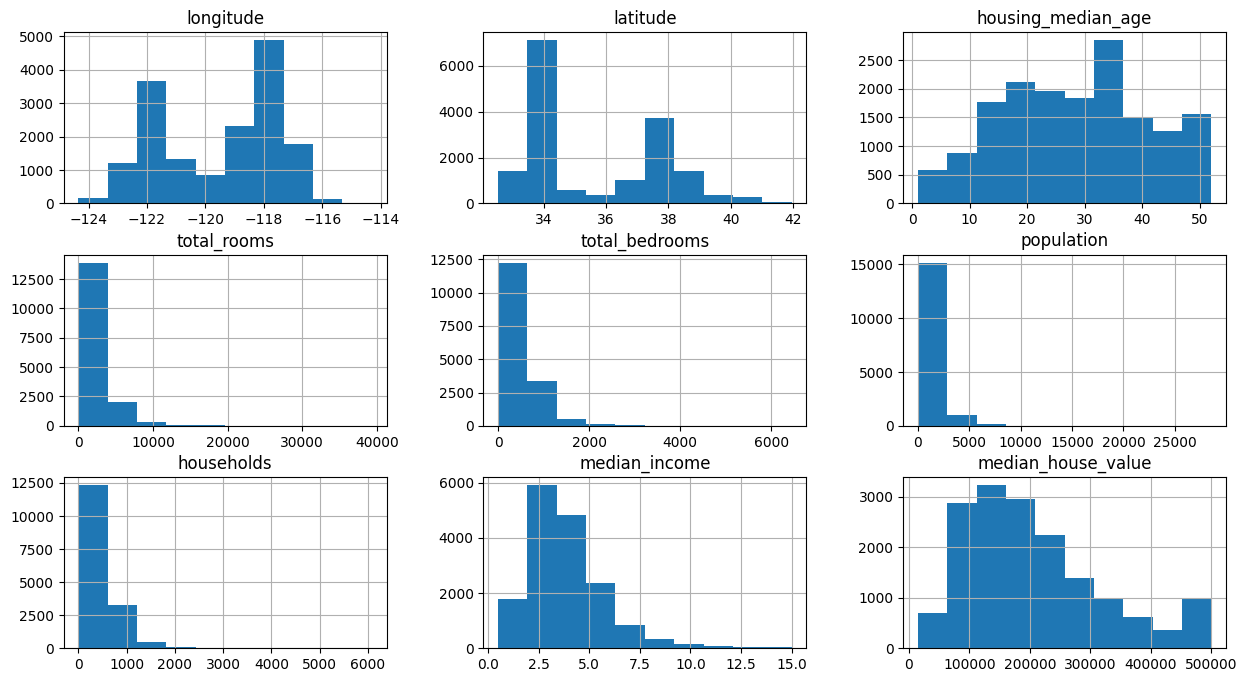

In [81]:
# Plotting histograms for all numerical features in the training dataset
train_data.hist(figsize=(15, 8))  # Setting the figure size to 15x8 for better visualization

In [85]:
# Convert 'ocean_proximity' categorical column to numeric using one-hot encoding
train_data = pd.get_dummies(train_data, columns=["ocean_proximity"], drop_first=True)

In [87]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.923749,-0.107852,0.041316,0.066712,0.098829,0.054225,-0.024059,-0.047687,-0.053268,0.009477,-0.471801,0.042447
latitude,-0.923749,1.000000,0.010699,-0.033164,-0.064263,-0.107244,-0.069453,-0.073479,-0.145180,0.351186,-0.016644,0.355963,-0.159358
housing_median_age,-0.107852,0.010699,1.000000,-0.361692,-0.322269,-0.303152,-0.305050,-0.110946,0.105333,-0.237863,0.014114,0.260843,0.016987
total_rooms,0.041316,-0.033164,-0.361692,1.000000,0.930627,0.866093,0.921014,0.193019,0.130078,0.030025,-0.009031,-0.024653,-0.007665
total_bedrooms,0.066712,-0.064263,-0.322269,0.930627,1.000000,0.886901,0.981637,-0.011337,0.047570,-0.002817,-0.005945,-0.022310,0.002117
population,0.098829,-0.107244,-0.303152,0.866093,0.886901,1.000000,0.913496,0.002392,-0.028328,-0.012399,-0.012173,-0.065201,-0.021865
households,0.054225,-0.069453,-0.305050,0.921014,0.981637,0.913496,1.000000,0.010659,0.063540,-0.033598,-0.010688,-0.013812,0.004294
median_income,-0.024059,-0.073479,-0.110946,0.193019,-0.011337,0.002392,0.010659,1.000000,0.688413,-0.237251,-0.009424,0.063706,0.023580
median_house_value,-0.047687,-0.145180,0.105333,0.130078,0.047570,-0.028328,0.063540,0.688413,1.000000,-0.488297,0.022274,0.162063,0.139004
ocean_proximity_INLAND,-0.053268,0.351186,-0.237863,0.030025,-0.002817,-0.012399,-0.033598,-0.237251,-0.488297,1.000000,-0.010686,-0.240199,-0.265743


<Axes: >

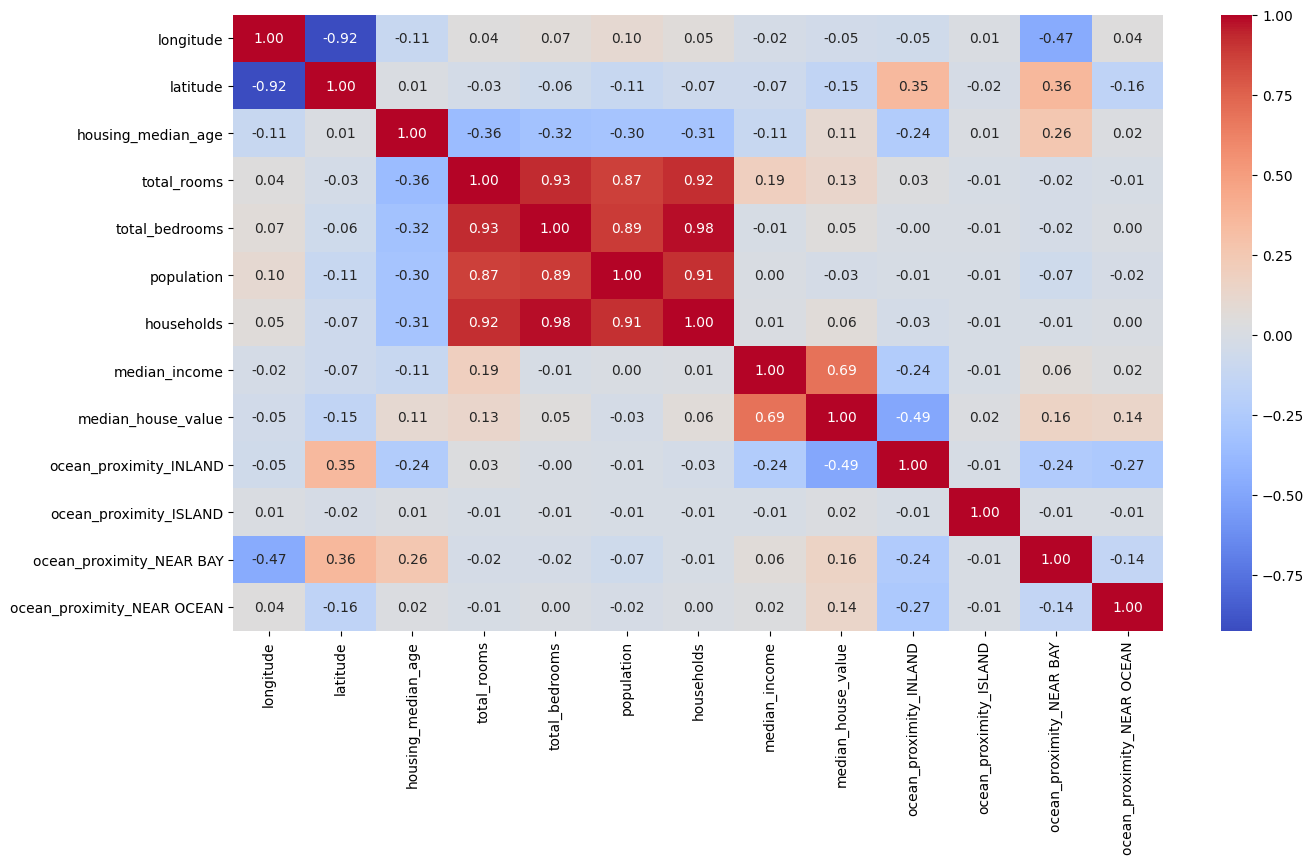

In [89]:
# Setting the figure size for better visualization
plt.figure(figsize=(15, 8))  

# Creating a heatmap to visualize the correlation matrix of the training dataset
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")

<Axes: xlabel='latitude', ylabel='longitude'>

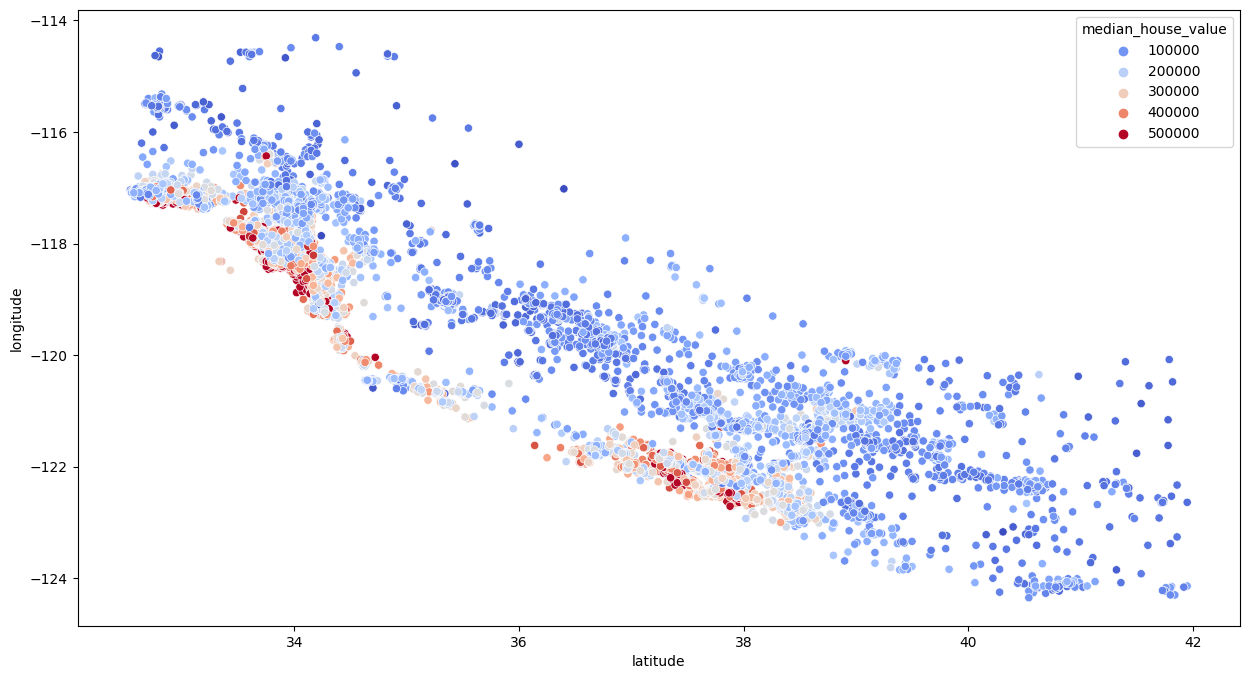

In [91]:
# Setting the figure size for better visualization
plt.figure(figsize = (15, 8))

# Creating a scatter plot to visualize geographical distribution of house values
sns.scatterplot(x = 'latitude', y = 'longitude', data = train_data, hue = 'median_house_value', palette = 'coolwarm')

In [93]:
# Creating a new feature 'bedroom_ratio' that represents the proportion of bedrooms to total rooms
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']

# Creating a new feature 'household_rooms' that represents the average number of rooms per household
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

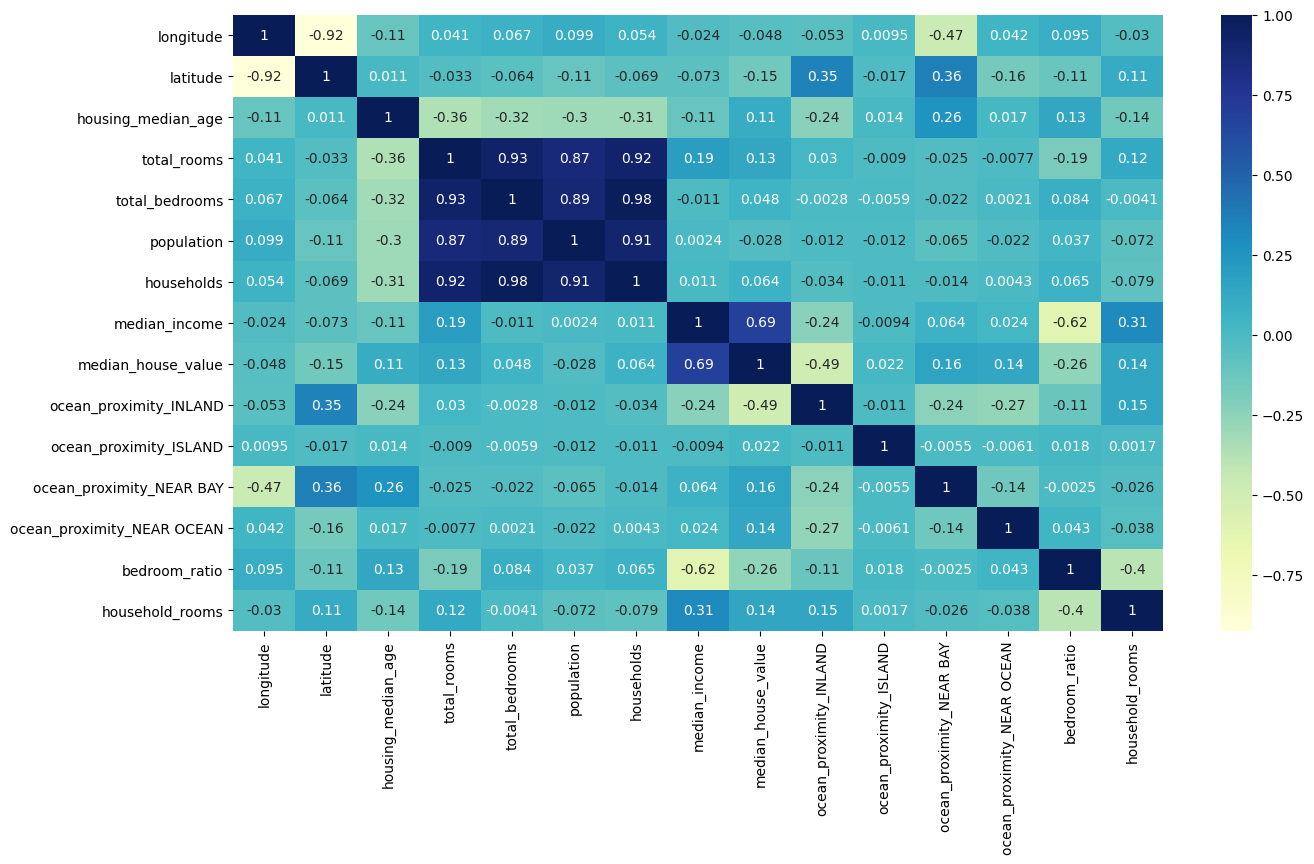

In [95]:
# Setting the figure size for better visualization
plt.figure(figsize=(15,8))

# Creating a heatmap to visualize the correlation matrix of the training dataset
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Initializing a StandardScaler to normalize the features
scaler = StandardScaler()

# Splitting features (X_train) and target variable (y_train) from the training dataset
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

# Standardizing the features by transforming them to have zero mean and unit variance
X_train_s = scaler.fit_transform(X_train)

# Initializing and training a Linear Regression model
reg = LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [99]:
# Combining test features and target variable into a single DataFrame
test_data = X_test.join(y_test)

# Applying log transformation to reduce skewness in numerical features
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)  # Adding 1 to avoid log(0)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

# Converting categorical variable 'ocean_proximity' into dummy variables
# drop_first=True removes the first category to avoid multicollinearity
test_data = pd.get_dummies(test_data, columns=["ocean_proximity"], drop_first=True)

# Creating new engineered features
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']  # Ratio of bedrooms to total rooms
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']  # Average number of rooms per household


In [101]:
X_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [103]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,bedroom_ratio,household_rooms
15624,-122.41,37.80,52.0,6.700731,5.533389,6.445720,5.513429,2.5875,500001.0,False,False,True,False,0.825789,1.215347
739,-122.14,37.67,37.0,8.057377,6.282267,7.310550,6.298949,4.8125,188300.0,False,False,True,False,0.779691,1.279162
18350,-122.15,37.41,29.0,6.161207,4.644391,5.886104,4.477337,7.0309,475000.0,False,False,True,False,0.753812,1.376088
891,-121.94,37.54,27.0,8.220403,6.267201,7.397562,6.289716,6.2179,305300.0,False,False,False,False,0.762396,1.306959
20353,-119.05,34.13,12.0,4.060443,3.135494,4.248495,2.772589,5.0066,275000.0,False,False,False,True,0.772205,1.464495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18143,-122.06,37.34,20.0,8.142063,6.386879,7.165493,6.317165,6.7578,451400.0,False,False,False,False,0.784430,1.288879
12691,-121.39,38.57,33.0,7.881937,5.880533,6.761573,5.886104,8.4016,338700.0,True,False,False,False,0.746077,1.339075
11109,-117.90,33.85,32.0,7.381502,5.752573,6.894670,5.726848,3.3375,186200.0,False,False,False,False,0.779323,1.288929
19960,-119.25,36.23,24.0,7.608871,5.874931,6.939254,5.863631,3.4306,139200.0,True,False,False,False,0.772116,1.297638


In [107]:
# Standardizing the test data using the previously fitted scaler (scaler.fit was applied to X_train earlier)
X_test_s = scaler.transform(X_test)

# Evaluating the performance of the trained Linear Regression model on the standardized test data
# The score function returns the R^2 (coefficient of determination) of the prediction on test data
reg.score(X_test_s, y_test)

-0.8266891635950553

In [109]:
from sklearn.ensemble import RandomForestRegressor

# Initializing a Random Forest Regressor model
forest = RandomForestRegressor()

# Training the Random Forest model using the standardized training data (X_train_s) and target variable (y_train)
forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [110]:
forest.score(X_test_s, y_test)

0.1679519679456628

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Initializing a Random Forest Regressor model
forest = RandomForestRegressor()

# Defining the hyperparameter grid to search through
param_grid = {
    'n_estimators': [3, 10, 30],  # Number of trees in the forest
    'max_features': [2, 4, 6, 8]   # Number of features to consider for splitting a node
}

# Initializing GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    forest,                # Model to tune
    param_grid,            # Hyperparameter grid
    cv=5,                  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Scoring metric: Negative Mean Squared Error (used to minimize error)
    return_train_score=True  # Return training scores to evaluate overfitting/underfitting
)

# Running grid search to find the best hyperparameters
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [123]:
# Getting the best model (the one with the optimal hyperparameters) from grid search
best_forest = grid_search.best_estimator_

# Evaluating the performance of the best model on the test data
best_forest.score(X_test_s, y_test)  # Returns the R² score on the test data

0.24184896605091488